# Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import validation_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV, RFE


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Read Data - First Explorations

In [4]:
train_X = pd.read_csv("X_train.csv")
train_Y = pd.read_csv("y_train.csv")
test_X = pd.read_csv("X_test.csv")

In [5]:
train_X.describe()

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
count,1212.000000,1131.000000,1109.000000,1120.000000,1121.000000,1120.000000,1109.000000,1115.000000,1.141000e+03,1107.000000,...,1122.000000,1125.000000,1115.000000,1121.000000,1121.000000,1129.000000,1134.000000,1114.000000,1128.000000,1120.000000
mean,605.500000,99950.259599,3700.973242,99952.674351,999.878485,10003.234172,10.560136,104988.622757,1.049311e+06,104873.397104,...,10.546657,10.549044,997.984921,1002.272047,104961.970228,105084.116415,6827.455450,10.018963,104996.343999,2.273542
std,350.018571,9507.428211,951.972172,9694.609524,98.475232,995.636885,0.278115,2772.688140,2.796303e+04,2819.085942,...,0.282640,0.284364,99.196323,97.411804,2848.366922,2778.638867,1388.303791,0.988671,2866.279846,0.169032
min,0.000000,65533.368423,180.312021,68544.573581,694.745271,6681.561828,10.012297,100006.895320,1.000035e+06,100006.968807,...,10.010096,10.011404,672.421564,695.036386,100031.313458,100012.210027,1696.036569,6.899008,100003.049706,1.589261
25%,302.750000,93927.054166,3062.487099,93578.607837,937.307868,9344.214960,10.344954,102715.791896,1.025417e+06,102458.900764,...,10.320100,10.331584,933.281247,938.386416,102481.703543,102856.790750,5995.899520,9.368188,102630.943377,2.175289
50%,605.500000,100215.152009,3668.027201,99338.884459,999.260914,10018.714253,10.546303,104871.393293,1.049304e+06,104872.132969,...,10.541972,10.538567,999.893279,1003.124009,105011.047274,105049.977900,6832.795027,9.977797,104901.792534,2.292501
75%,908.250000,106080.316442,4316.314133,106191.825136,1066.837193,10651.361400,10.795440,107319.429566,1.073427e+06,107262.203508,...,10.782896,10.790727,1064.131695,1065.058925,107345.821783,107558.912360,7653.315741,10.683951,107512.971002,2.380113
max,1211.000000,130226.576502,7301.087839,132221.045067,1434.200505,13560.223285,11.096427,109994.027849,1.099940e+06,109999.319400,...,11.081758,11.084130,1378.181767,1329.066747,109972.306067,109999.847537,12344.927658,13.188278,109993.046071,2.846222


In [6]:
train_X.std()[train_X.std() == 0]

x169    0.0
x283    0.0
x367    0.0
x777    0.0
dtype: float64

In [7]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 833 entries, id to x831
dtypes: float64(833)
memory usage: 7.7 MB


In [8]:
train_data = pd.merge(left=train_X, right=train_Y, how='inner')
train_data = train_data.drop(['id'], axis=1)

## Spooky!

In [9]:
bad_columns = []
for x in range(832):
    col = train_X['x%d'%x].dropna(0)
    _min = col.min()
    _max = col.max()
    if abs(0.10 - ((_max-_min)/_min))<0.01:
        bad_columns.append('x%d'%x)

/Users/afra/phase3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/afra/phase3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [10]:
train_X = train_X.drop(['x169', 'x283', 'x367', 'x777'], axis=1)
test_X = test_X.drop(['x169', 'x283', 'x367', 'x777'], axis=1)

In [11]:
train_X = train_X.drop(bad_columns, axis=1)
test_X = test_X.drop(bad_columns, axis=1)

# Checking for null values

## Count number of null values per row

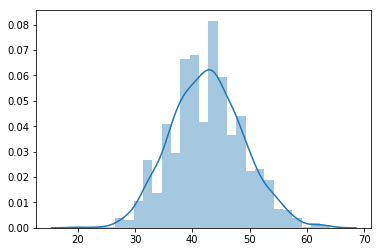

In [12]:
is_null_row = train_X.isnull().sum(axis=1)
is_null_row.sort_values(inplace=True, ascending=False)
sns.distplot(np.asarray(is_null_row))

## Count number of null values per feature

In [13]:
is_null_count = train_X.isnull().sum() / len(train_X)*100
is_null_data = is_null_count[is_null_count>0]
is_null_data.sort_values(inplace=True, ascending=False)
print(train_X.shape)
train_X_wt_null = train_X.dropna()
print(train_X_wt_null.shape)

(1212, 559)
(0, 559)


In [14]:
is_null_data = is_null_data.to_frame()
is_null_data.columns = ['count']
is_null_data.astype({'count': 'float32'})
is_null_data.index.names = ['feature']
is_null_data['feature'] = is_null_data.index

In [15]:
is_null_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, x420 to x294
Data columns (total 2 columns):
count      558 non-null float64
feature    558 non-null object
dtypes: float64(1), object(1)
memory usage: 13.1+ KB


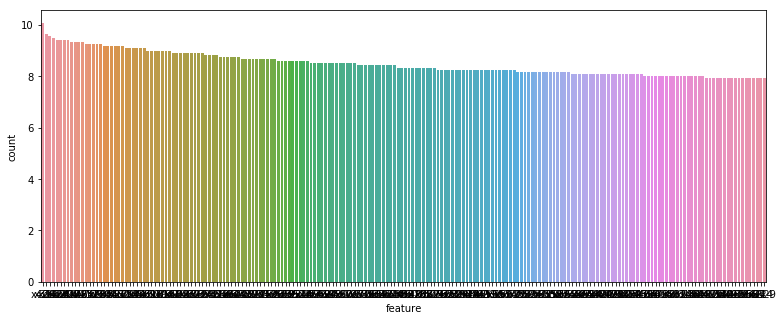

In [16]:
plt.figure(figsize=(13, 5))
sns.barplot(x='feature', y='count', data=is_null_data[:200])
plt.show()

## Imputing Missing Values

In [17]:
for coll in train_X.columns:
    train_X[coll].fillna((train_X[coll].median()), inplace=True)
    test_X[coll].fillna((train_X[coll].median()), inplace=True)

In [18]:
np.sum(test_X.isnull().sum())

0

# Correlations

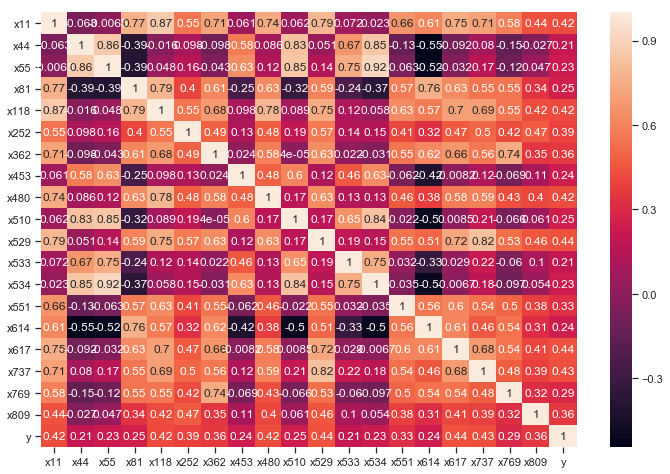

In [673]:
corr = train_data.corr()
top_features = corr.index[abs(corr['y']>0.2)]
plt.subplots(figsize=(12, 8))
top_corr = train_data[top_features].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

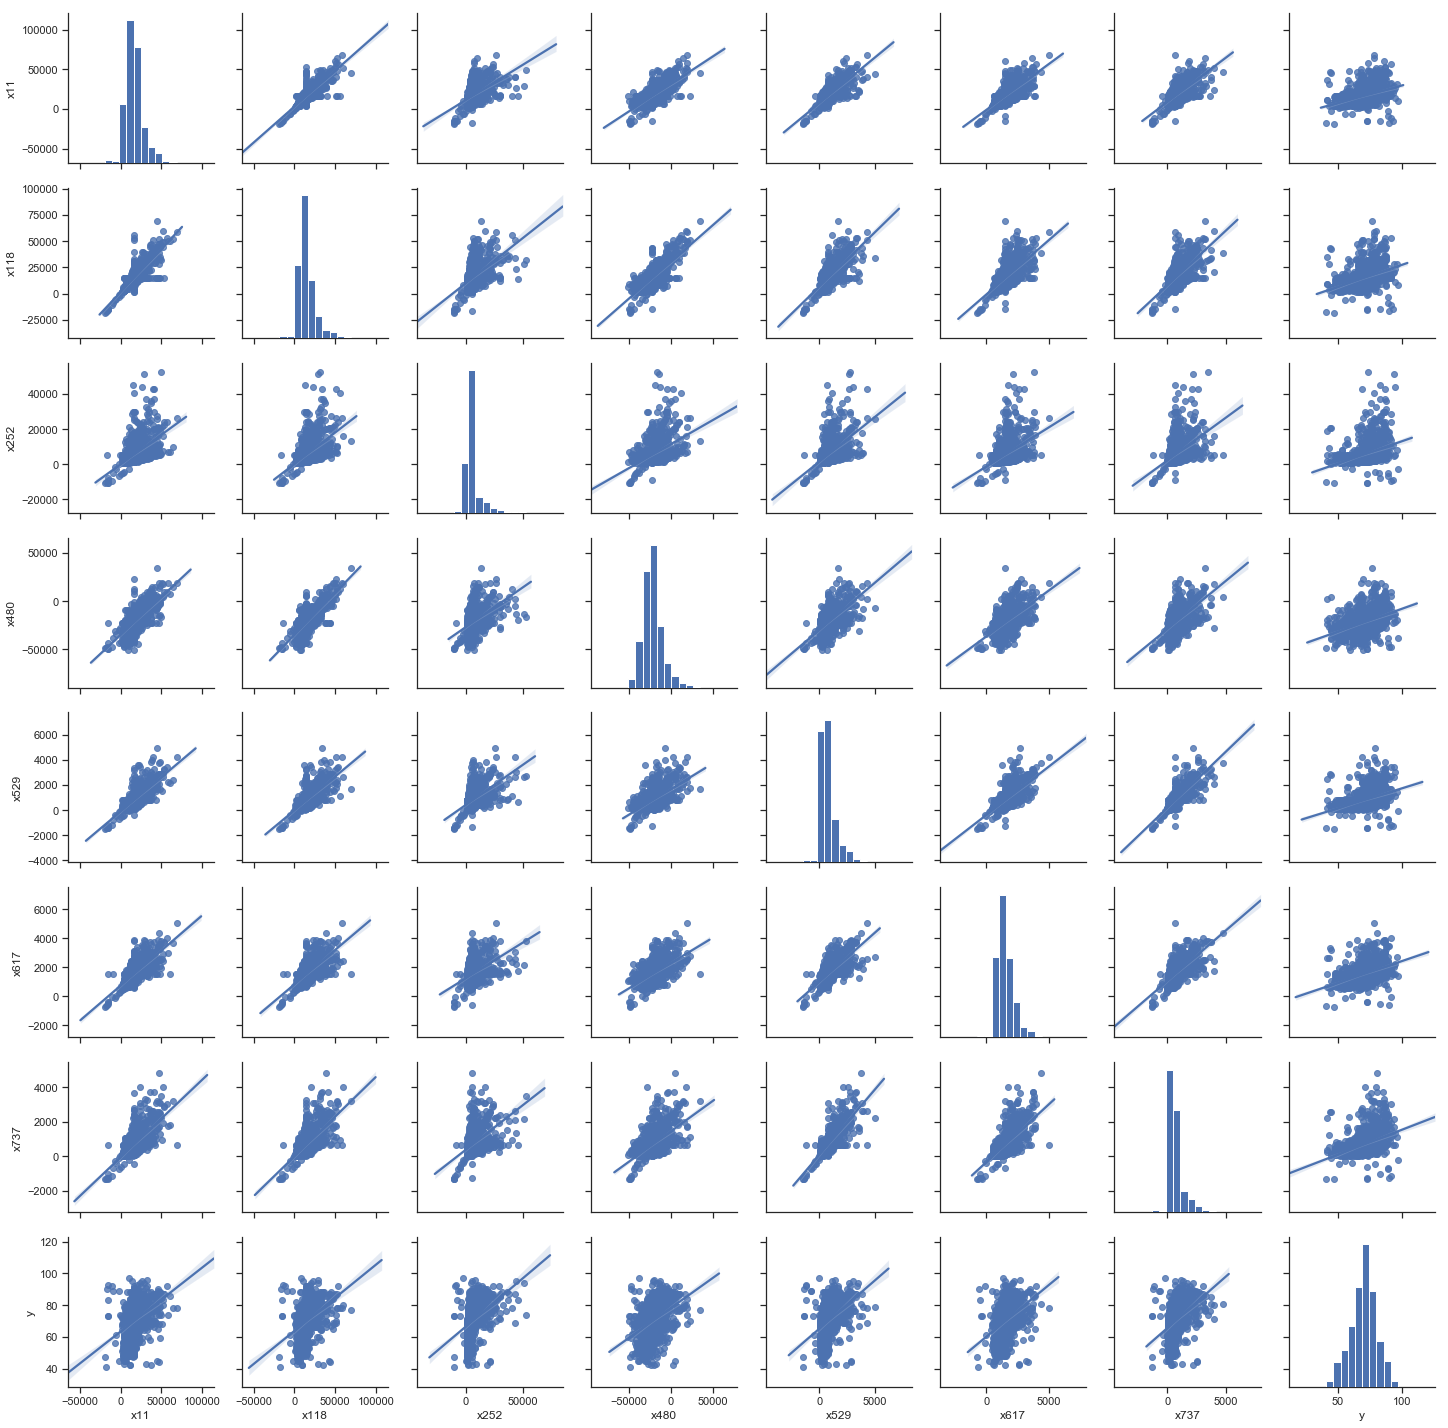

In [289]:
col = corr.index[abs(corr['y']>0.4)]
sns.set(style='ticks')
train_data_na = train_data.fillna(0)
sns.pairplot(train_data_na[col], kind='reg')

## Plot y distribution


 mu = 69.88 and sigma = 10.01



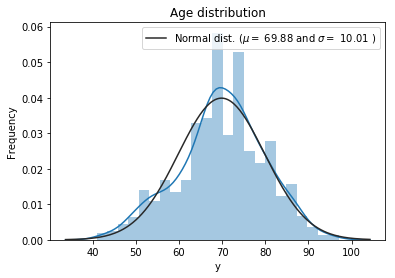

In [17]:
from scipy.stats import norm, skew

sns.distplot(train_Y["y"] , fit=norm);

(mu, sigma) = norm.fit(train_Y["y"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Age distribution')

plt.show()

# Feature Selection

## Remove Low Variance

In [150]:
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=(.7 * (1 - .7)))
train_X = sel.fit_transform(train_X)
test_X = sel.transform(test_X)
print(train_X.shape)
print(test_X.shape)

train_X = pd.DataFrame(data=train_X)
test_X = pd.DataFrame(data=test_X)

test_X.head()

(1212, 437)
(776, 437)


,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,0.0,116890.145646,4682.826460,102084.432558,988.163180,10412.331659,10160.746836,92.102663,13005.027108,96332.360512,...,940.043948,1.018596e+06,11.488937,10566.039550,11726.076836,308.527403,1030.608247,1018.364228,7347.221554,8.598623
1,1.0,104149.957877,3161.012055,93566.104799,1037.879907,11232.156777,9741.271391,97.646296,11839.066832,80441.981187,...,806.061662,1.097794e+06,9.155820,6618.057675,7449.007042,164.964660,1049.620654,972.516069,5687.349133,9.791258
2,2.0,91332.402246,3922.735224,108810.999713,1008.536233,12030.362103,29805.808452,91.544259,12324.051753,98858.429824,...,1162.003308,9.417935e+05,9.521701,8318.041107,9937.076870,239.545088,973.772111,1068.819601,6510.915424,10.993281
3,3.0,93281.714961,3707.283134,86947.473251,947.048927,10037.466655,24318.660351,109.785056,14354.006359,106302.806550,...,604.055456,1.070027e+06,10.590269,9359.051945,7560.051884,155.766708,918.617516,1003.124009,6832.795027,9.845355
4,4.0,88434.057156,5184.106152,85396.992336,1101.076469,10083.474388,35395.097145,117.336314,12395.082163,87752.328822,...,1126.008585,1.205195e+06,10.331671,11594.060026,10526.013038,439.041722,945.230640,1032.396697,6586.500123,11.953965


## Mutual information

In [151]:
mi_KB = SelectKBest(score_func=lambda X,y:mutual_info_regression(X, y, random_state=44), k=40)
train_X= mi_KB.fit_transform(train_X,train_Y["y"])
train_X.shape
train_X = pd.DataFrame(data=train_X)

In [152]:
test_X = mi_KB.transform(test_X)
print(test_X.shape)

(776, 40)


In [153]:
test_X = pd.DataFrame(data=test_X)
test_X.head()
test_X.to_csv("test_data_cleaned.csv")

## Select with Tree Based Model

In [115]:
GBoost = GradientBoostingRegressor(max_depth=20, n_estimators=300, min_samples_leaf=15, min_samples_split=10, random_state =5)
GBoost.fit(train_X.values, train_Y["y"].values)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=20,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

(44, 2)


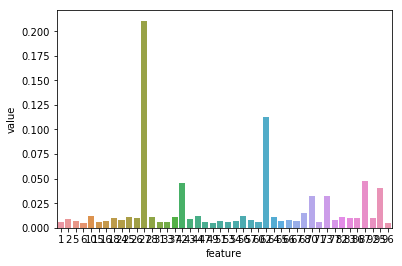

In [120]:
importances = GBoost.feature_importances_
importances_df = pd.DataFrame(data=importances, columns=['value'])
importances_df['feature'] = np.asarray(importances_df.index)
importances_df = importances_df.sort_values(axis=0, by='value', ascending=False)
importances_df = importances_df[importances_df['value'] > 0.005]
print(importances_df.shape)
sns.barplot(x=importances_df['feature'], y=importances_df['value'])

In [122]:
feature_sel = SelectFromModel(GBoost, prefit=True)
train_X = feature_sel.transform(train_X)
print(train_X.shape)
test_X = feature_sel.transform(test_X)
print(test_X.shape)

(1212, 19)
(776, 19)


In [123]:
train_X = pd.DataFrame(data=train_X)

In [124]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3549.605688,11710.635964,19257.531031,2243.302901,4903.849481,395.539640,7346.839297,9862.014048,200415.802153,564.003090,-23257.200182,4896.352852,46331.016931,1045.689682,8843.003297,428.342815,4117.433449,266.863177,54.672160
1,4744.166091,18732.348823,25498.011999,2608.930250,5669.565701,449.927942,9430.575216,12391.059745,296376.354374,163.163481,-39720.641951,7899.753576,52332.557487,1269.789300,9539.048563,346.832172,5591.337288,175.179986,54.672160
2,3697.978654,17844.195649,22918.040993,7759.176464,8883.488732,327.483910,7913.283619,12062.070672,233742.444178,1836.514563,-36122.201873,6935.128030,67632.047597,1971.570050,9183.045389,316.107035,8489.822079,942.853867,805.482669
3,4142.065755,14063.174407,19257.531031,1818.615834,5265.968749,294.613797,8542.248694,9172.058484,188718.107119,459.178240,-26235.552577,5818.558342,53470.083314,1399.022467,8329.047950,261.989061,5230.308862,283.879920,99.129244
4,2953.830511,14197.902402,18762.085160,7231.383826,5164.237012,291.345017,6496.708149,10608.010713,220508.696580,3009.587437,-26517.685033,5233.266995,170111.226862,3791.751924,8342.074821,263.153175,5372.274019,3327.509708,246.717392


## Recursive Feature Elimination

In [19]:
estimator = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_leaf=15, min_samples_split=10,
                                   random_state=5)
selector = RFE(estimator, step=0.1,n_features_to_select=60,verbose=1)
# selector = RFECV(estimator, step=0.1,cv=5,min_features_to_select=50,verbose=1)
print('Before drop: ', train_X.shape)
X_train_mi = selector.fit_transform(train_X, train_Y["y"])
X_test_mi = selector.transform(test_X)
print('After drop: ', train_X)

Before drop:  (1212, 559)
Fitting estimator with 559 features.
Fitting estimator with 504 features.
Fitting estimator with 449 features.
Fitting estimator with 394 features.
Fitting estimator with 339 features.
Fitting estimator with 284 features.
Fitting estimator with 229 features.
Fitting estimator with 174 features.
Fitting estimator with 119 features.
Fitting estimator with 64 features.
After drop:            id             x0           x1             x2           x3  \
0        0.0  118345.392781  3104.010883   82378.542430  1086.678601   
1        1.0  100215.152009  5889.055991   97932.067482  1116.564363   
2        2.0   95373.022035  6293.442455   93371.369288  1034.722073   
3        3.0  105066.272301  3279.162164  119554.079514  1114.014483   
4        4.0   98957.033333  4177.482190   97239.708338  1049.430921   
5        5.0  105225.715294  5338.257405  116079.992681  1101.463563   
6        6.0   97960.147371  5863.337683  100946.915512  1011.367297   
7        7.0   9

In [20]:
train_X = pd.DataFrame(data=X_train_mi)
test_X = pd.DataFrame(data=X_test_mi)

In [21]:
print(train_X.shape)
print(test_X.shape)
train_X.head()

(1212, 60)
(776, 60)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,3190.807192,2.704241,2.581677,3301.080084,1403.866000,9291.193684,1611.075483,2.403206,3797.256428,1.729415,...,428.342815,4117.433449,266.863177,2.745800,110.306381,2.249932,8892.089295,2.623261,54.672160,2.195345
1,4513.867329,2.775572,2.792264,3736.089020,1808.431913,18423.700135,2033.034388,2.412461,4686.455616,2.043377,...,346.832172,5591.337288,175.179986,2.928650,101.973051,2.305038,9666.062556,2.795805,54.672160,2.431250
2,4982.962606,2.712587,1.967325,3500.099196,1717.919117,39176.219061,2178.049117,2.385539,4215.360614,1.574070,...,316.107035,8489.822079,942.853867,2.633866,86.843954,2.114024,8907.063973,2.517557,805.482669,2.373508
3,3476.190275,2.694653,2.886550,2747.077446,1524.977738,16213.024512,1351.067090,2.551741,4400.217445,1.785241,...,261.989061,5230.308862,283.879920,2.658636,101.546024,2.540007,9250.087660,2.630379,99.129244,2.597321
4,4212.356214,2.654292,1.782781,4568.097254,1305.370285,31267.618199,2493.042909,2.141536,3542.963064,1.716292,...,263.153175,5372.274019,3327.509708,2.577441,97.863157,2.127373,8143.056938,2.553629,246.717392,2.232927


## f_regression(Not used)

In [1172]:
from sklearn.feature_selection import f_regression, mutual_info_regression
train_X=SelectKBest(score_func=f_regression,k=40).fit_transform(train_X,train_Y["y"])
train_X.shape
train_X = pd.DataFrame(data=train_X)

/Users/afra/phase3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:292: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
/Users/afra/phase3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/afra/phase3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/afra/phase3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [1173]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,8540.631501,3549.605688,2.397493,2.200633,9291.193684,3797.256428,733.642599,1381.219402,2.095916,365.717633,...,2.663286,428.342815,1.958090,266.863177,2.043021,2.745800,2.044409,54.672160,2.195345,2.299202
1,12227.659681,4744.166091,2.520117,2.441796,18423.700135,4686.455616,1301.630212,1991.674815,2.140445,792.368659,...,2.846958,346.832172,2.248635,175.179986,2.334971,2.928650,2.373233,54.672160,2.431250,2.472763
2,37236.771970,3697.978654,2.352784,2.376765,39176.219061,4215.360614,768.062662,1267.710206,2.189173,328.723853,...,2.726296,316.107035,1.852434,942.853867,2.258541,2.633866,1.975405,805.482669,2.373508,2.292501
3,12524.569427,4142.065755,2.702942,2.573197,16213.024512,4400.217445,631.811465,1659.314590,2.244873,704.790863,...,2.833204,261.989061,2.009452,283.879920,2.319084,2.658636,2.238173,99.129244,2.597321,2.484935
4,29445.870677,2953.830511,2.313956,2.285363,31267.618199,3542.963064,404.856564,1045.326860,1.900307,425.081947,...,2.548397,263.153175,1.933369,3327.509708,1.974655,2.577441,1.924618,246.717392,2.232927,1.930136


# Check for outliers

In [23]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination='auto', behaviour='new', random_state=43)
preds = clf.fit(train_X).predict(train_X.values)
print(np.sum(preds < 0))
print(np.sum(preds > 0))

77
1135


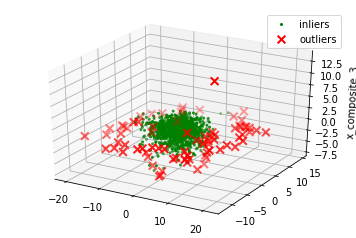

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  
scaler = StandardScaler()
#normalize the metrics
X_n = scaler.fit_transform(train_X.values)
X_reduce = pca.fit_transform(X_n)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

inlier_idx = preds > 0
outlier_idx = preds < 0
# Plot the compressed data points
ax.scatter(X_reduce[inlier_idx, 0], X_reduce[inlier_idx, 1], zs=X_reduce[inlier_idx, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers

ax.scatter(X_reduce[outlier_idx,0],X_reduce[outlier_idx,1], X_reduce[outlier_idx,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [25]:
train_X = train_X.drop(list(np.where(preds < 0)[0]))
train_X.shape

(1135, 60)

In [26]:
train_Y = train_Y.drop(list(np.where(preds < 0)[0]))
train_Y.shape

(1135, 2)

In [346]:
train_X.to_csv("train_x_cleaned.csv")
train_Y.to_csv("train_y_cleaned.csv")

# Check skewness of features + normalization (Not Used)

In [1660]:
# train_X = train_X.drop(["id"], axis=1)
train_X = (train_X - train_X.min()) / (train_X.max() - train_X.min())
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.332144,0.315319,0.378646,0.538245,0.529202,0.328428,0.788793,0.314941,0.419943,0.254912,...,0.413273,0.397503,0.125526,0.166288,0.187380,0.505678,0.418570,0.305241,0.495191,0.294195
3,0.370129,0.360601,0.381000,0.720200,0.513730,0.487814,0.639209,0.267336,0.405926,0.397059,...,0.637233,0.368543,0.174705,0.211758,0.366788,0.499967,0.379221,0.457852,0.630182,0.430156
4,0.564948,0.552932,0.166479,0.476816,0.491256,0.385749,0.605961,0.267663,0.462311,0.488516,...,0.730073,0.394111,0.151996,0.362712,0.437232,0.528107,0.613454,0.541940,0.271370,0.270724
5,0.816685,0.510931,0.566552,0.294578,0.552574,0.405955,0.546714,0.272151,0.536725,0.442050,...,0.648118,0.381437,0.150729,0.332670,0.274968,0.705834,0.378539,0.350689,0.435542,0.255306
7,0.490277,0.524971,0.272937,0.633859,0.430887,0.237728,0.563758,0.273547,0.419943,0.464917,...,0.834497,0.263938,0.074476,0.193692,0.197809,0.351246,0.396013,0.403251,0.378271,0.519663


In [1661]:
skew_features = train_X.apply(lambda x: skew(x)).sort_values(ascending=False)
print("Skewness of features: \n")
skewness = pd.DataFrame({'Skew' :skew_features})
skewness.head(10)
# skewness[abs(skewness['Skew'])>.75]

Skewness of features: 



,Skew
93,4.099285
29,3.419477
71,2.595700
86,2.170877
22,2.035697
65,1.842566
14,1.353454
92,1.343181
1,1.221078
73,1.018498


In [1662]:
skewness = skewness[abs(skewness['Skew'])>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_X[feat] = boxcox1p(train_X[feat], lam)
#     test_X_norm[feat] = boxcox1p(test_X_norm[feat], lam)

There are 18 skewed numerical features to Box Cox transform


In [1663]:
train_data_na = (train_X.isnull().sum() / len(train_X)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data.head()

,Missing Ratio


# Train Test Split

In [1279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y["y"], test_size=0.33, random_state=7)

# Train Different Regressors

In [27]:
n_folds = 10

def r2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X.values)
    r2= cross_val_score(model, train_X.values, train_Y["y"].values, scoring="r2", cv = kf, )
    return(r2)

## Random Forest

In [265]:
grid={"n_estimators":[300], "max_depth":[i for i in range(3, 15)], "max_features":[1.0, 0.1, 0.3]}
rf = RandomForestRegressor(random_state=5, max_features='sqrt')
rf_cv=GridSearchCV(rf,grid,cv=10, scoring='r2', verbose=2)
rf_cv.fit(train_X.values, train_Y["y"].values)

print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] max_depth=3, max_features=1.0, n_estimators=300 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. max_depth=3, max_features=1.0, n_estimators=300, total=   1.9s
[CV] max_depth=3, max_features=1.0, n_estimators=300 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .. max_depth=3, max_features=1.0, n_estimators=300, total=   2.0s
[CV] max_depth=3, max_features=1.0, n_estimators=300 .................


KeyboardInterrupt: 

In [132]:
rf = RandomForestRegressor(max_depth=13, max_features=0.3, n_estimators=300, random_state=5)
rf.fit(train_X.values, train_Y["y"].values)
f_i = rf.feature_importances_
print(r2_cv(rf).mean())

0.587328577954


In [31]:
rf.fit(train_X.values, train_Y["y"].values)
y_rf = rf.predict(train_X.values)
y_rf_test = rf.predict(test_X.values)

## Gradient Boosting

In [28]:
grid={"n_estimators":[300], "learning_rate":[0.1], "max_depth":[i for i in range(3, 15)], "max_features":[1.0, 0.1, 0.3]}
GBoost = GradientBoostingRegressor(min_samples_leaf=15, min_samples_split=10, random_state =5)
logreg_cv=GridSearchCV(GBoost,grid,cv=10, scoring='r2', verbose=2)
logreg_cv.fit(train_X.values, train_Y["y"].values)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300, total=   2.0s
[CV] learning_rate=0.1, max_depth=3, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth

[CV]  learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300, total=   0.8s
[CV] learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300, total=   1.2s
[CV] learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300, total=   1.0s
[CV] learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300, total=   1.2s
[CV] learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300, total=   1.0s
[CV] learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300, total=   1.0s
[CV] learning_rate=0.1, max_depth=4, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth

[CV]  learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300, total=   0.6s
[CV] learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300, total=   0.6s
[CV] learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300, total=   0.6s
[CV] learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300, total=   0.5s
[CV] learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300, total=   0.5s
[CV] learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300, total=   0.5s
[CV] learning_rate=0.1, max_depth=6, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth

[CV]  learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300, total=   7.2s
[CV] learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300, total=   7.9s
[CV] learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300, total=   7.9s
[CV] learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300, total=   5.3s
[CV] learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300, total=   4.9s
[CV] learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, max_features=1.0, n_estimators=300, total=   4.8s
[CV] learning_rate=0.1, max_depth=8, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth

[CV]  learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300, total=   1.8s
[CV] learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300, total=   1.8s
[CV] learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=9, max_features=0.3, n_estimators=300, total=   1.8s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=10, max_features=1.0, n_estimators=300, total=   7.2s
[CV] learning_rate=0.1, max_depth=10, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_de

[CV]  learning_rate=0.1, max_depth=11, max_features=0.1, n_estimators=300, total=   0.8s
[CV] learning_rate=0.1, max_depth=11, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=11, max_features=0.1, n_estimators=300, total=   0.8s
[CV] learning_rate=0.1, max_depth=11, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=11, max_features=0.1, n_estimators=300, total=   0.9s
[CV] learning_rate=0.1, max_depth=11, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=11, max_features=0.1, n_estimators=300, total=   0.9s
[CV] learning_rate=0.1, max_depth=11, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=11, max_features=0.3, n_estimators=300, total=   2.0s
[CV] learning_rate=0.1, max_depth=11, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=11, max_features=0.3, n_estimators=300, total=   2.0s
[CV] learning_rate=0.1, max_depth=11, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.

[CV]  learning_rate=0.1, max_depth=13, max_features=1.0, n_estimators=300, total=   6.7s
[CV] learning_rate=0.1, max_depth=13, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=13, max_features=1.0, n_estimators=300, total=   6.8s
[CV] learning_rate=0.1, max_depth=13, max_features=1.0, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=13, max_features=1.0, n_estimators=300, total=   6.7s
[CV] learning_rate=0.1, max_depth=13, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=13, max_features=0.1, n_estimators=300, total=   0.8s
[CV] learning_rate=0.1, max_depth=13, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=13, max_features=0.1, n_estimators=300, total=   0.8s
[CV] learning_rate=0.1, max_depth=13, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=13, max_features=0.1, n_estimators=300, total=   0.8s
[CV] learning_rate=0.1, max_depth=13, max_features=0.1, n_estimators=300 
[CV]  learning_rate=0.

[CV]  learning_rate=0.1, max_depth=14, max_features=0.3, n_estimators=300, total=   2.8s
[CV] learning_rate=0.1, max_depth=14, max_features=0.3, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=14, max_features=0.3, n_estimators=300, total=   3.1s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 15.3min finished
/Users/afra/phase3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.3, 'n_estimators': 300}
accuracy : 0.69140836945


In [29]:
GBoost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1,
                                   max_depth=5, max_features=0.3 ,
                                   min_samples_leaf=15, min_samples_split=10,
                                   random_state =5)
# print(r2_cv(GBoost).mean())

### validation curve

In [198]:
train_scores, valid_scores = validation_curve(GradientBoostingRegressor, train_X.values, 
                                              train_Y["y"].values,
                                              "n_estimators", 300, 
                                              "learning_rate", 0.1, "max_depth", 14, 
                                              "max_features", 0.3, "min_samples_leaf", 15,
                                              "min_samples_split", 10, "random_state", 5, cv=10)

TypeError: validation_curve() missing 2 required positional arguments: 'param_name' and 'param_range'

In [163]:
GBoost.fit(train_X.values, train_Y["y"].values)
y_GBoost = GBoost.predict(train_X.values)
y_test_predict = GBoost.predict(test_X.values)

## XGBoost

In [32]:
grid={"max_depth":[i for i in range(5, 10)]}
model_xgb = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, random_state =5, nthread = -1)
model_xgb_cv=GridSearchCV(model_xgb, grid, cv=10, scoring='r2', verbose=2)
model_xgb_cv.fit(train_X.values, train_Y["y"].values)

print("tuned hpyerparameters :(best parameters) ",model_xgb_cv.best_params_)
print("accuracy :",model_xgb_cv.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] max_depth=5 .....................................................
[10:44:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... max_depth=5, total=   2.8s
[CV] max_depth=5 .....................................................
[10:45:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ...................................... max_depth=5, total=   2.5s
[CV] max_depth=5 .....................................................
[10:45:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ...................................... max_depth=5, total=   2.5s
[CV] max_depth=5 .....................................................
[10:45:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ...................................... max_depth=5, total=   2.8s
[CV] max_depth=5 .....................................................
[10:45:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ...................................... max_depth=5, total=   2.7s
[CV] max_depth=5 .....................................................
[10:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecate

[CV] ...................................... max_depth=8, total=   4.0s
[CV] max_depth=8 .....................................................
[10:46:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ...................................... max_depth=8, total=   4.3s
[CV] max_depth=8 .....................................................
[10:46:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ...................................... max_depth=8, total=   4.3s
[CV] max_depth=8 .....................................................
[10:46:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ...................................... max_depth=8, total=   4.2s
[CV] max_depth=8 .....................................................
[10:47:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecate

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished
/Users/afra/phase3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


tuned hpyerparameters :(best parameters)  {'max_depth': 5}
accuracy : 0.683207749645


In [33]:
model_xgb = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, 
                              n_estimators=300,
                             random_state =5, nthread = -1)
print(r2_cv(model_xgb).mean())

[10:48:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [35]:
model_xgb.fit(train_X.values, train_Y["y"].values)
y_xgb = model_xgb.predict(train_X.values)
y_xgb_test = model_xgb.predict(test_X.values)

[22:30:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Hist Gradient Boosting

In [36]:
grid={"max_depth":[i for i in range(14, 20)]}
est = HistGradientBoostingRegressor(random_state=5)
logreg_cv=GridSearchCV(est,grid,cv=10, scoring='r2', verbose=2)
logreg_cv.fit(train_X.values, train_Y["y"].values)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] max_depth=14 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................................... max_depth=14, total=   2.4s
[CV] max_depth=14 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ..................................... max_depth=14, total=   2.1s
[CV] max_depth=14 ....................................................
[CV] ..................................... max_depth=14, total=   2.1s
[CV] max_depth=14 ....................................................
[CV] ..................................... max_depth=14, total=   2.0s
[CV] max_depth=14 ....................................................
[CV] ..................................... max_depth=14, total=   1.9s
[CV] max_depth=14 ....................................................
[CV] ..................................... max_depth=14, total=   2.1s
[CV] max_depth=14 ....................................................
[CV] ..................................... max_depth=14, total=   2.0s
[CV] max_depth=14 ....................................................
[CV] ..................................... max_depth=14, total=   2.0s
[CV] max_depth=14 ....................................................
[CV] .

[CV] ..................................... max_depth=19, total=   2.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.1min finished


tuned hpyerparameters :(best parameters)  {'max_depth': 16}
accuracy : 0.68126114532


In [37]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

est = HistGradientBoostingRegressor(max_depth=16, random_state=5)
# print(r2_cv(est).mean())

## Ada Boost

In [75]:
ada = AdaBoostRegressor(random_state=0, n_estimators=300, learning_rate=0.1, verbose=1)
print(r2_cv(est).mean())

0.61436298826


In [ ]:
ada.fit(train_X.values, train_Y["y"].values)
y_ada = ada.predict(train_X.values)
y_ada_test = ada.predict(test_X.values)

## Linear Regressors

In [1672]:
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.1, random_state=1).fit(train_X.values, train_Y["y"].values)
print(train_X.shape)
train_X = pd.DataFrame(data=train_X)
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.1, l1_ratio=1, random_state=3))

# print("Lasso {}".format(r2_cv(lasso).mean()))
# print("ENet {}".format(r2_cv(ENet).mean()))

(1115, 20)


# Averaging

## Neural Network

In [1873]:
y_GBoost = y_GBoost.reshape((y_GBoost.shape[0], 1))
y_rf = y_rf.reshape((y_rf.shape[0], 1))
y_xgb = y_xgb.reshape((y_rf.shape[0], 1))

In [1874]:
tmp = np.concatenate((y_GBoost, y_rf),axis=1)
X_final = np.concatenate((tmp, y_xgb), axis=1)

In [1875]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(random_state=1)
clf.fit(X_final, train_Y["y"].values)
clf.predict(X_final)

array([ 75.99436904,  54.92645104,  66.56405454, ...,  67.17223007,
        74.55822188,  66.37771025])

In [1876]:
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X.values)
r2= cross_val_score(clf, X_final, train_Y["y"].values, scoring="r2", cv = kf, )

In [1877]:
print(r2.mean())

0.962990308632


### Test Results

In [1878]:
y_GBoost_test = y_GBoost_test.reshape((y_GBoost_test.shape[0], 1))
y_rf_test = y_rf_test.reshape((y_rf_test.shape[0], 1))
y_xgb_test = y_xgb_test.reshape((y_xgb_test.shape[0], 1))

tmp_test = np.concatenate((y_GBoost_test, y_rf_test),axis=1)
X_final_test = np.concatenate((tmp_test, y_xgb_test), axis=1)

In [1880]:
y_test_predict = clf.predict(X_final_test)

## Simple Average

In [39]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('est', est), ('model_xgb', model_xgb), ('GBoost', GBoost)])
# score = r2_cv(er)

er.fit(train_X.values, train_Y["y"].values)
y_test_predict = er.predict(test_X.values)
# print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[11:18:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Prepare Final Results

In [40]:
y_test_predict

array([ 63.31224361,  69.82629712,  86.10243959,  69.37333041,
        78.71391483,  79.33175406,  60.07082295,  65.77479326,
        70.80818808,  61.290081  ,  75.53222181,  63.81075443,
        57.99010661,  75.78582571,  66.7956053 ,  65.75494597,
        71.02269155,  62.85504626,  74.33607662,  72.99045837,
        77.06490356,  67.16910789,  83.51042024,  69.69190428,
        77.3200673 ,  72.18362443,  77.26762336,  59.41829659,
        78.34456784,  81.8957422 ,  67.41167655,  68.86686374,
        79.79085269,  70.16975692,  65.75390238,  75.70692397,
        74.89656494,  79.34414236,  63.38996269,  72.71870604,
        70.11551481,  57.90960558,  82.41604942,  62.84358632,
        69.51107666,  62.62996309,  74.15853108,  71.60739822,
        74.2647664 ,  55.07348062,  55.97851702,  59.22524304,
        65.20631042,  80.67792364,  79.02567908,  72.66298895,
        72.73212353,  70.53084475,  80.66617965,  62.50413583,
        75.05368734,  58.84590085,  58.11958799,  62.80

In [41]:
y_test_df = pd.DataFrame(data=y_test_predict)
y_test_df.columns = ["y"]
y_test_df["id"] = y_test_df.index
y_test_df = y_test_df[["id", "y"]]

In [42]:
y_test_df.to_csv("s6.csv", index=False)

In [43]:
y_test_df.min()

id     0.000000
y     50.217118
dtype: float64

In [44]:
y_test_df.max()

id    775.000000
y      87.179578
dtype: float64